## Load data

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower'] = iris.target
df['flower_name'] = df['flower'].apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
flower               0
flower_name          0
dtype: int64

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df0 = df[df.flower==0]
df1 = df[df.flower==1]
df2 = df[df.flower==2]

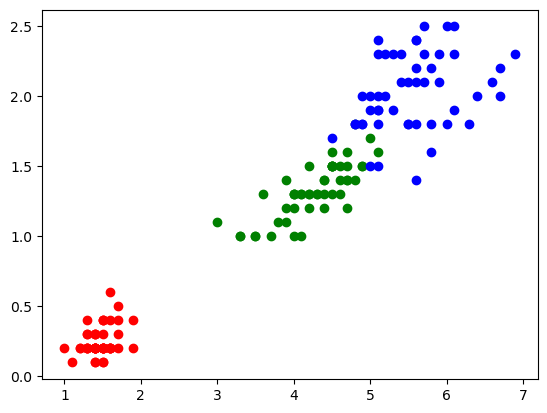

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='blue')

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.2)

## Model Creation

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [15]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors':range(1,10)
},cv=5, return_train_score=False)
clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00069399, 0.00036974, 0.00037937, 0.00032339, 0.00027971,
        0.00026031, 0.00022578, 0.00021081, 0.00019941]),
 'std_fit_time': array([5.72869737e-04, 2.62262171e-05, 2.86127725e-05, 2.16100370e-05,
        1.76696318e-05, 2.89027833e-06, 1.01746368e-05, 1.64076333e-06,
        5.97589403e-06]),
 'mean_score_time': array([0.00151381, 0.00115304, 0.00122943, 0.00098763, 0.0008872 ,
        0.00081682, 0.00071225, 0.0006752 , 0.00061703]),
 'std_score_time': array([7.77082406e-04, 6.89507850e-05, 9.26184958e-05, 6.78206950e-05,
        5.10406013e-05, 3.04127173e-05, 3.44692913e-05, 2.73589864e-05,
        1.29932657e-05]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors

In [17]:
results = pd.DataFrame(clf.cv_results_)
results[['param_n_neighbors','mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.960000
1,2,0.946667
2,3,0.966667
3,4,0.973333
4,5,0.973333
5,6,0.980000
6,7,0.980000
7,8,0.966667
8,9,0.973333
